In [1]:
from keras.datasets import reuters

Using TensorFlow backend.
C:\Users\Aryan\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Aryan\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Aryan\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Aryan\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
(training_data, training_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [3]:
print(training_data.shape)
print(training_labels.shape)
print(test_data.shape)
print(test_labels.shape)

(8982,)
(8982,)
(2246,)
(2246,)


In [4]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_article = " ".join([reverse_word_index.get(i-3, "") for i in training_data[1]])
print(decoded_article)

 generale de banque sa lt  br and lt heller overseas corp of chicago have each taken 50 pct stakes in  company sa  factors generale de banque said in a statement it gave no financial details of the transaction sa   turnover in 1986 was 17 5 billion belgian francs reuter 3


In [5]:
import numpy as np

def vectorize_sequence(sequences, dimension = 10000):
    result = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        result[i][sequence] = 1
    return result

x_training = vectorize_sequence(training_data)
x_test = vectorize_sequence(test_data)

In [6]:
def vectorize_label(labels, dimension = 46):
    result = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        result[i][label] = 1
    return result

y_training = vectorize_label(training_labels)
y_test = vectorize_label(test_labels)

In [7]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation = "relu", input_shape = (10000, )))
model.add(layers.Dense(64, activation = "relu"))
model.add(layers.Dense(46, activation = "softmax"))

In [8]:
model.compile(optimizer = "rmsprop", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [9]:
x_tst1 = x_training[:1000]
x_trn1 = x_training[1000:]

y_tst1 = y_training[:1000]
y_trn1 = y_training[1000:]

In [10]:
history = model.fit(x_trn1, y_trn1, epochs = 20, batch_size = 512, validation_data = (x_tst1, y_tst1))


Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 152us/step - loss: 2.5246 - accuracy: 0.5137 - val_loss: 1.6504 - val_accuracy: 0.6490
Epoch 2/20
7982/7982 [==============================] - 1s 115us/step - loss: 1.3749 - accuracy: 0.7085 - val_loss: 1.2798 - val_accuracy: 0.7130
Epoch 3/20
7982/7982 [==============================] - 1s 116us/step - loss: 1.0236 - accuracy: 0.7804 - val_loss: 1.1136 - val_accuracy: 0.7670
Epoch 4/20
7982/7982 [==============================] - 1s 119us/step - loss: 0.7990 - accuracy: 0.8315 - val_loss: 1.0153 - val_accuracy: 0.7840
Epoch 5/20
7982/7982 [==============================] - 1s 125us/step - loss: 0.6274 - accuracy: 0.8677 - val_loss: 0.9819 - val_accuracy: 0.7870
Epoch 6/20
7982/7982 [==============================] - 1s 121us/step - loss: 0.4981 - accuracy: 0.8958 - val_loss: 0.9531 - val_accuracy: 0.7950
Epoch 7/20
7982/7982 [==============================] - 1s 117us/step - los

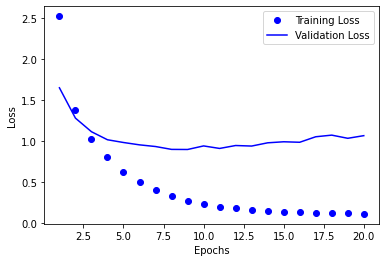

In [11]:
import matplotlib.pyplot as plt

history_dict = history.history

loss = history_dict["loss"]
val_loss = history_dict["val_loss"]
epochs = range(1, len(loss)+1)


plt.plot(epochs, loss, "bo", label = "Training Loss")
plt.plot(epochs, val_loss, "b", label = "Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

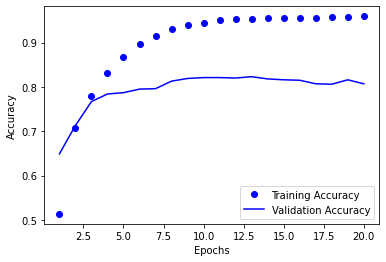

In [12]:
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

plt.clf()

plt.plot(epochs, acc, "bo", label = "Training Accuracy")
plt.plot(epochs, val_acc, "b", label = "Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

In [13]:
model = models.Sequential()

model.add(layers.Dense(64, activation = "relu", input_shape = (10000, )))
model.add(layers.Dense(64, activation = "relu"))
model.add(layers.Dense(46, activation = "softmax"))

model.compile(optimizer = "rmsprop", loss = "categorical_crossentropy", metrics = ["accuracy"])

model.fit(x_trn1, y_trn1, epochs = 9, batch_size = 512, validation_data = (x_tst1, y_tst1))

results = model.evaluate(x_test, y_test)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 148us/step - loss: 2.6121 - accuracy: 0.5262 - val_loss: 1.7484 - val_accuracy: 0.6200
Epoch 2/9
7982/7982 [==============================] - 1s 119us/step - loss: 1.4301 - accuracy: 0.6999 - val_loss: 1.3175 - val_accuracy: 0.7320
Epoch 3/9
7982/7982 [==============================] - 1s 115us/step - loss: 1.0650 - accuracy: 0.7765 - val_loss: 1.1718 - val_accuracy: 0.7540
Epoch 4/9
7982/7982 [==============================] - 1s 119us/step - loss: 0.8385 - accuracy: 0.8240 - val_loss: 1.0441 - val_accuracy: 0.7820
Epoch 5/9
7982/7982 [==============================] - 1s 113us/step - loss: 0.6682 - accuracy: 0.8601 - val_loss: 0.9763 - val_accuracy: 0.7910
Epoch 6/9
7982/7982 [==============================] - 1s 119us/step - loss: 0.5334 - accuracy: 0.8900 - val_loss: 0.9263 - val_accuracy: 0.8020
Epoch 7/9
7982/7982 [==============================] - 1s 121us/step - loss: 0.427

In [14]:
print(results)

[0.9798281625881857, 0.7902938723564148]


In [15]:
predictions = model.predict(x_test)

In [16]:
print(np.argmax(predictions[0]))

3
